In [1]:
%matplotlib inline

# Neighbors enrichment analysis

This example shows how to run the neighbors enrichment analysis routine.

It calculates an enrichment score based on proximity on the connectivity
graph of cell clusters. The number of observed events is compared
against $N$ permutations and a *z-score* is computed.

::: seealso
See `sphx_glr_auto_examples_graph_compute_spatial_neighbors.py` for
general usage of `squidpy.gr.spatial_neighbors`.
:::


In [2]:
import squidpy as sq

adata = sq.datasets.visium_fluo_adata()
adata

AnnData object with n_obs × n_vars = 2800 × 16562
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

This dataset contains cell type annotations in `anndata.Anndata.obs`
which are used for calculation of the neighborhood enrichment. First, we
need to compute a connectivity matrix from spatial coordinates.


In [5]:
sq.gr.spatial_neighbors(adata)

Then we can calculate the neighborhood enrichment score with
`squidpy.gr.nhood_enrichment`.


In [6]:
sq.gr.nhood_enrichment(adata, cluster_key="cluster")

  0%|          | 0/1000 [00:00<?, ?/s]

> IDF: The neighbourhood enrichment results are stored under: `adata.uns['cluster_nhood_enrichment']`

In [7]:
adata

AnnData object with n_obs × n_vars = 2800 × 16562
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial', 'umap', 'spatial_neighbors', 'cluster_nhood_enrichment'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [8]:
adata.uns['cluster_nhood_enrichment']

{'zscore': array([[ 72.00615051, -11.34982287,  -5.38586136,  -8.62722998,
          -8.08762795,   2.74708154,  -3.45130676,  -1.54770795,
          -9.54116763,  -7.5800162 ,  -6.89573852,  -1.43218277,
          -2.96752562,  -9.21685848,  -4.84945934],
        [-11.34982287,  80.96341804, -13.5550259 ,  -4.78401924,
         -11.69386562, -12.97221694,  -5.63395564,  -6.89105664,
         -15.18053742, -14.47204303, -12.18602605,  -5.6049335 ,
          -8.02622194, -15.05319053,  -7.37604867],
        [ -5.38586136, -13.5550259 ,  49.46494259,  -1.94037039,
           0.73513625,  -4.35045819,  -4.93576347, -12.50309583,
         -10.72990845,  -8.80573207,  -8.70469071,  -4.04202791,
          -6.88921641, -12.95371766,  -6.47603153],
        [ -8.62722998,  -4.78401924,  -1.94037039,  74.71384657,
          -9.76612734,  -9.88369303,  -4.51368522, -11.93833497,
         -12.1843981 , -11.60351476,  -9.52663808,  -5.00892557,
          -6.62183808, -12.09832828,  -6.40397941],
  

And visualize the results with `squidpy.pl.nhood_enrichment`.


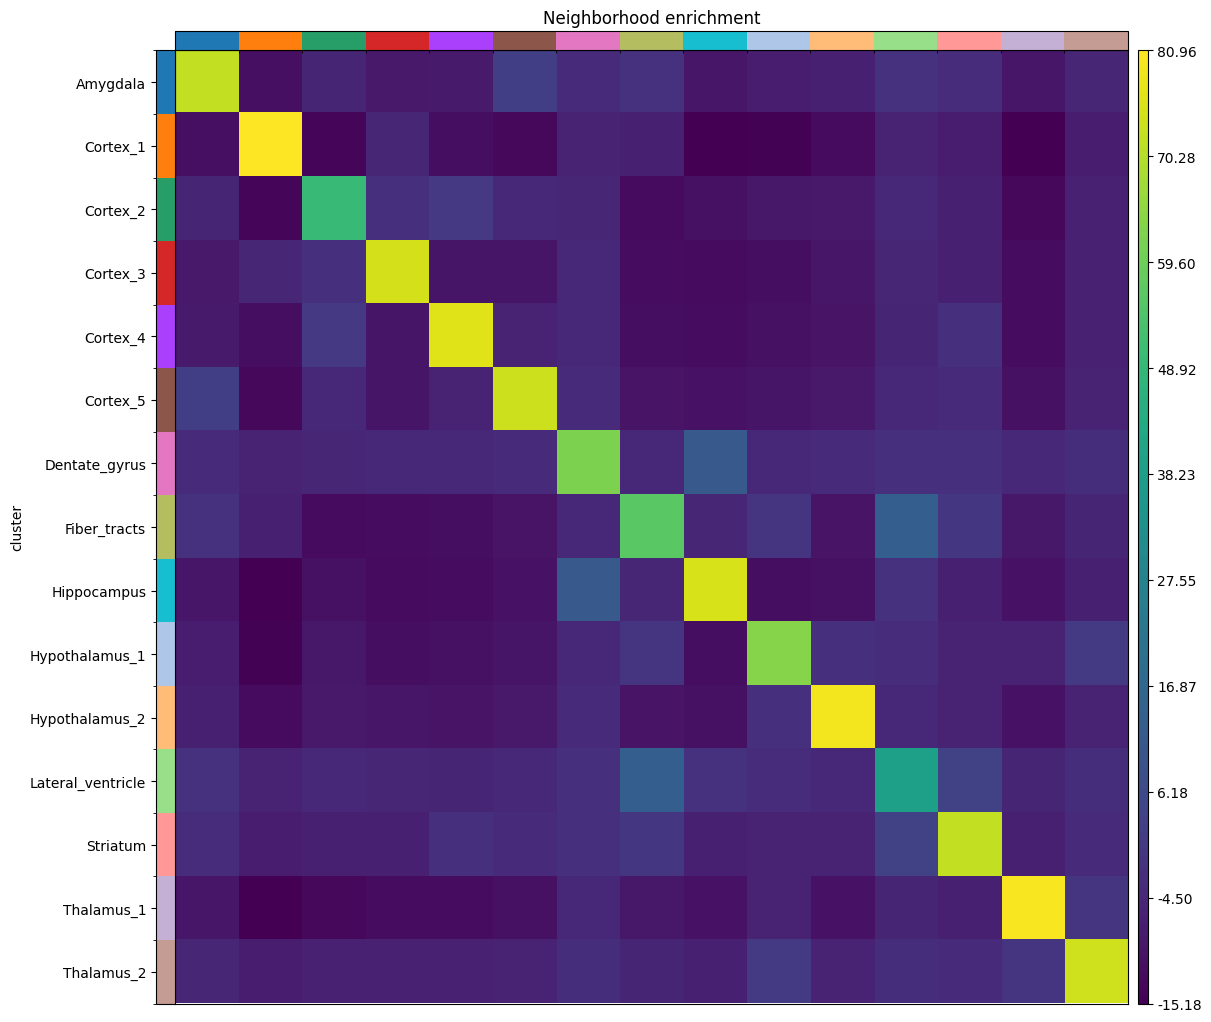

In [9]:
sq.pl.nhood_enrichment(adata, cluster_key="cluster")

  0%|          | 0/10 [00:00<?, ?/s]

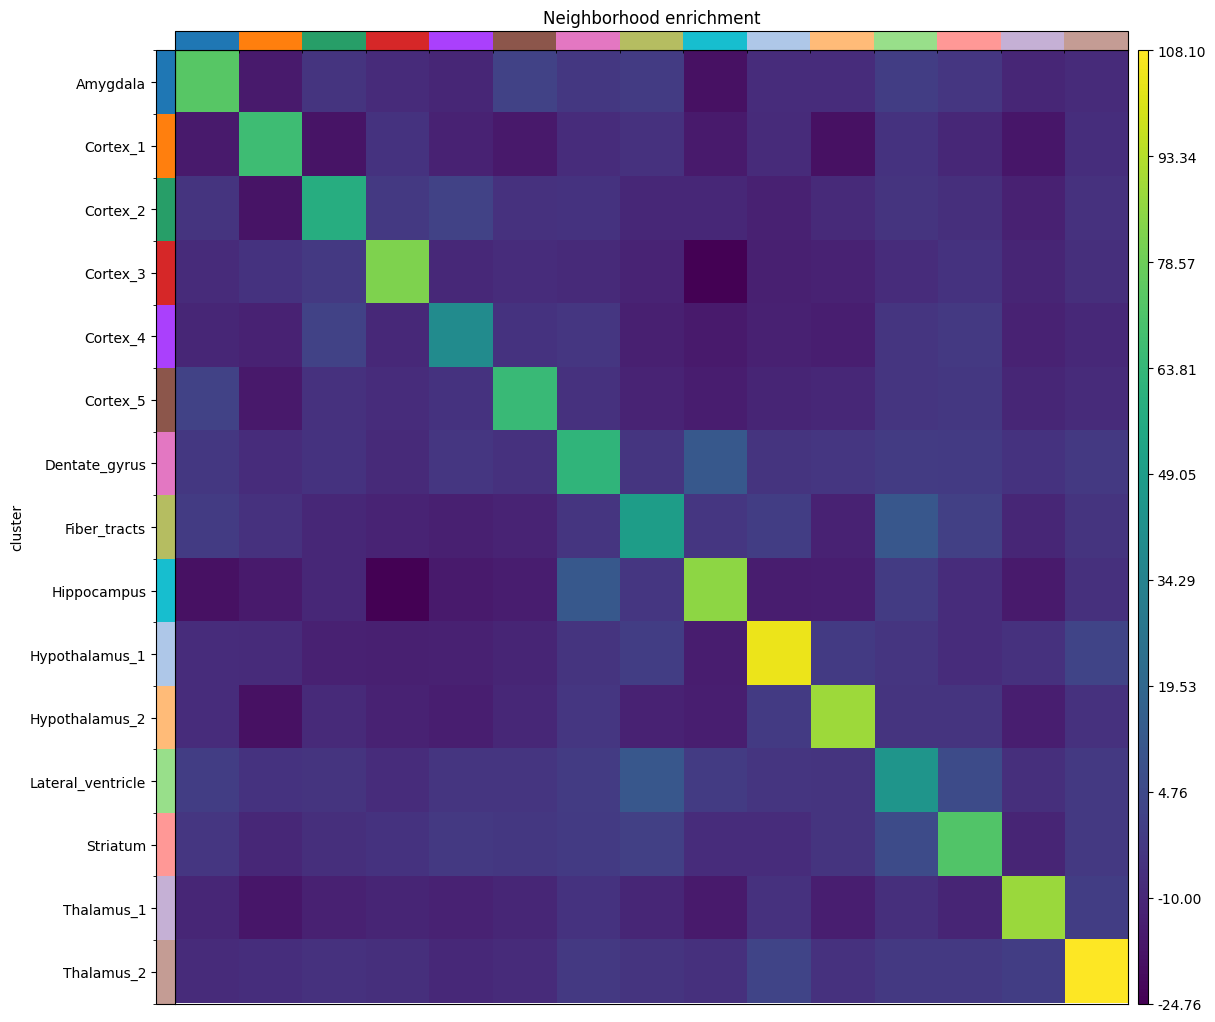

In [20]:
sq.gr.nhood_enrichment(adata, cluster_key="cluster", connectivity_key='spatial', n_perms=10) # 'spatial' for 'spatial_connectivities' is the default
sq.pl.nhood_enrichment(adata, cluster_key='cluster')

  0%|          | 0/1000 [00:00<?, ?/s]

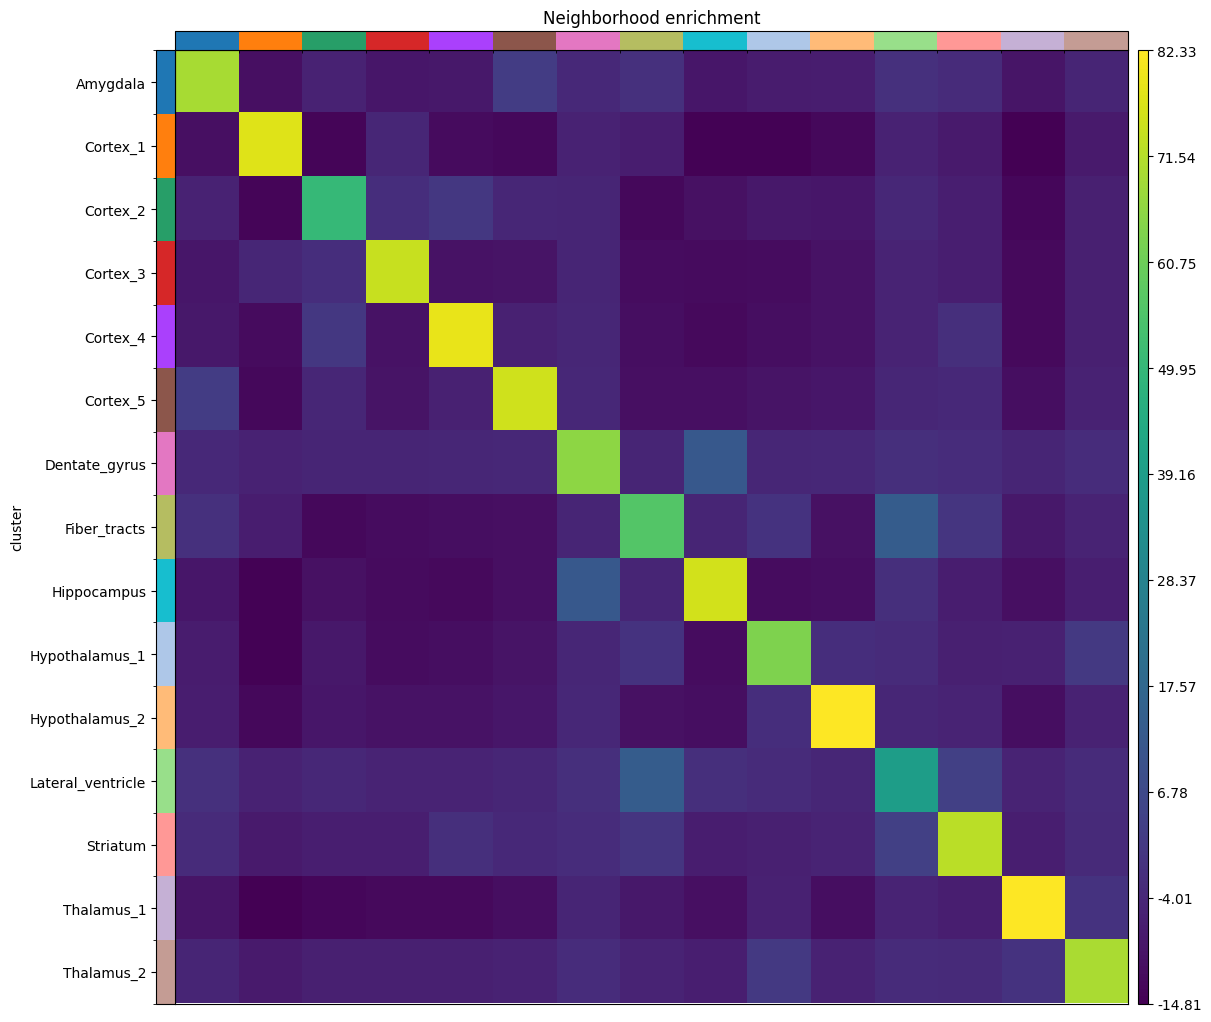

In [21]:
sq.gr.nhood_enrichment(adata, cluster_key="cluster", connectivity_key='spatial', n_perms=1000) # 'spatial' for 'spatial_connectivities' is the default
sq.pl.nhood_enrichment(adata, cluster_key='cluster')

> IDF: permutation nr. seems to yield plateauing results from n_perms>100 so no special kind of parameter adjustment seems necessary due to the computational effectiveness of the method.